In [26]:
pip install MiniSom

In [27]:
import pandas as pd
import seaborn as sns
from minisom import MiniSom
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from statistics import mean
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [28]:
train_df = pd.read_csv('/content/training_dataset.csv')
test_df = pd.read_csv('/content/test_dataset.csv')
val_df = pd.read_csv('/content/validation_dataset.csv')

In [ ]:
train_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8192,2976,85,23,95,72,2436,246,193,64,...,0,0,0,0,0,0,0,0,0,1
1,14089,3104,233,12,150,40,1503,200,251,186,...,0,0,0,0,0,0,0,0,0,1
2,10246,3385,160,7,937,204,1224,228,242,147,...,0,0,0,0,0,0,0,0,0,1
3,8686,3191,41,14,210,37,3207,221,208,119,...,1,0,0,0,0,0,0,0,0,1
4,9242,2821,297,4,85,1,992,208,238,169,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,9216,3294,328,13,624,192,3506,188,224,175,...,0,0,0,0,0,0,0,0,1,7
8282,7129,3390,24,6,216,13,3332,217,226,146,...,0,0,0,0,0,1,0,0,0,7
8283,9231,3350,100,18,175,-26,2121,247,212,88,...,0,0,0,0,0,0,1,0,0,7
8284,9656,3727,5,17,984,318,4934,195,204,143,...,0,0,0,0,0,0,0,0,1,7


In [29]:
# Separate the features and target variable
X_train, y_train = train_df.iloc[:, 1:-1], train_df.iloc[:, -1]
X_val, y_val = val_df.iloc[:, 1:-1], val_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, 1:-1], test_df.iloc[:, -1]

T-SNE Plot to visualize the complextiy od the dataset

In [31]:
# Perform TSNE to reduce the dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)

# Transform the training and test sets separately
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

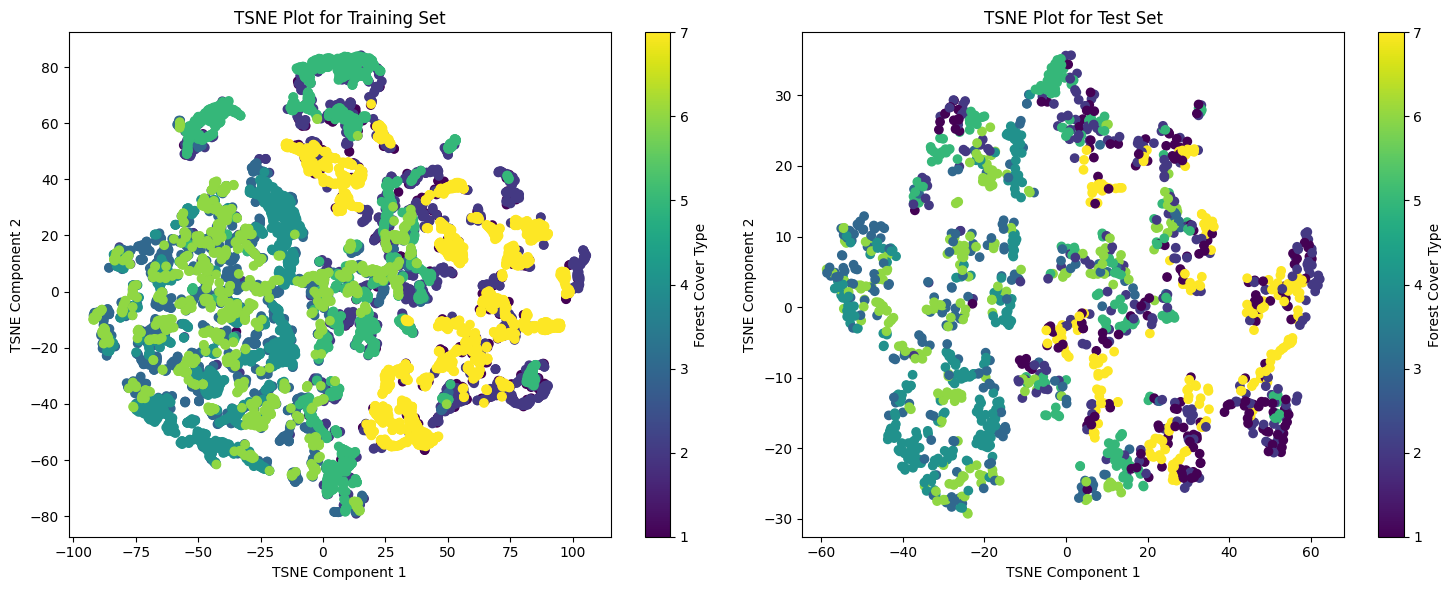

In [ ]:
# Create separate TSNE plots for the training and test sets
plt.figure(figsize=(15, 6))

# Plot for the Training Set
plt.subplot(1, 2, 1)
scatter_train = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
plt.colorbar(scatter_train, label='Forest Cover Type')
plt.title('TSNE Plot for Training Set')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

# Plot for the Test Set
plt.subplot(1, 2, 2)
scatter_test = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test)
plt.colorbar(scatter_test, label='Forest Cover Type')
plt.title('TSNE Plot for Test Set')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

plt.tight_layout()
plt.show()

In [ ]:
# Train a KNN classifier on the training dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Fit a LogisticRegression model to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Train an SVM model on the training set
svm = SVC()
svm.fit(X_train, y_train)


# Train the DecisionTreeClassifier model on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Train a Naive Bayes Classifier on the training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [ ]:
# make knn predictions on the test and validation datasets
knn_y_test_pred = knn.predict(X_test)
knn_y_val_pred = knn.predict(X_val)

# make LogisticRegression predictions on the test and validation datasets
lr_y_test_pred = lr.predict(X_test)
lr_y_val_pred = lr.predict(X_val)


# make svm prediction on the test and validation datasets
svm_y_test_pred = svm.predict(X_test)
svm_y_val_pred = svm.predict(X_val)

# Make DecisionTreeClassifier predictions on the test and validation sets
DT_y_test_pred = clf.predict(X_test)
DT_y_val_pred = clf.predict(X_val)

# Make Naive Bayes Classifier predictions on the test and validation sets
nb_y_test_pred = classifier.predict(X_test)
nb_y_val_pred = classifier.predict(X_val)

In [ ]:
# Calculate the accuracy of the KNN model on the validation set and the test set
knn_val_acc = accuracy_score(y_val, knn_y_val_pred)
knn_test_acc = accuracy_score(y_test, knn_y_test_pred)

# Calculate the accuracy of the  LogisticRegression model on the validation set and the test set
lr_val_acc = accuracy_score(y_val, lr_y_val_pred)
lr_test_acc = accuracy_score(y_test, lr_y_test_pred)

# Calculate the accuracy of the SVM model on the validation set and the test set
svm_val_acc = accuracy_score(y_val, svm_y_val_pred)
svm_test_acc = accuracy_score(y_test, svm_y_test_pred)

# Calculate the accuracy of the DecisionTreeClassifier model on the validation set and the test set
dt_val_acc = accuracy_score(y_val, DT_y_val_pred)
dt_test_acc = accuracy_score(y_test, DT_y_test_pred)


# Calculate the accuracy of the Naive Bayes Classifier model on the validation set and the test set
nb_val_acc = accuracy_score(y_val, nb_y_val_pred)
nb_test_acc = accuracy_score(y_test, nb_y_test_pred)

In [ ]:
# Calculate the confusion matrix for KNN
knn_val_cm = confusion_matrix(y_val, knn_y_val_pred)
knn_test_cm = confusion_matrix(y_test, knn_y_test_pred)

# Calculate the confusion matrix for  LogisticRegression
lr_val_cm = confusion_matrix(y_val, lr_y_val_pred)
lr_test_cm = confusion_matrix(y_test, lr_y_test_pred)

# Calculate the confusion matrix for SVM
svm_val_cm = confusion_matrix(y_val, svm_y_val_pred)
svm_test_cm = confusion_matrix(y_test, svm_y_test_pred)

# Calculate the confusion matrix for DecisionTreeClassifier
dt_val_cm = confusion_matrix(y_val, DT_y_val_pred)
dt_test_cm = confusion_matrix(y_test, DT_y_test_pred)

# Calculate the confusion matrix for Naive Bayes Classifier
nb_val_cm = confusion_matrix(y_val, nb_y_val_pred)
nb_test_cm = confusion_matrix(y_test, nb_y_test_pred)

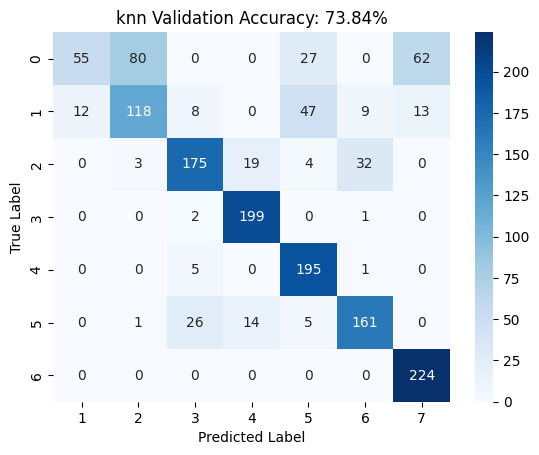

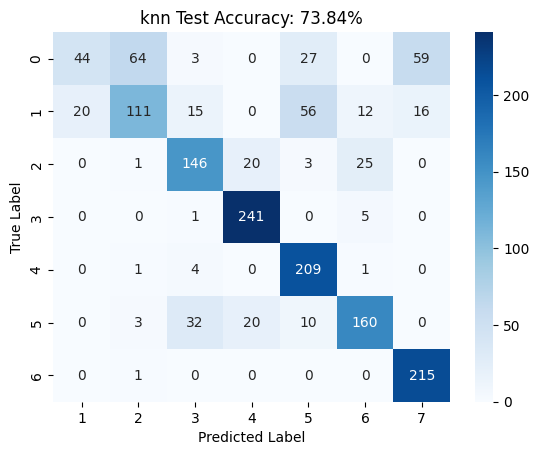

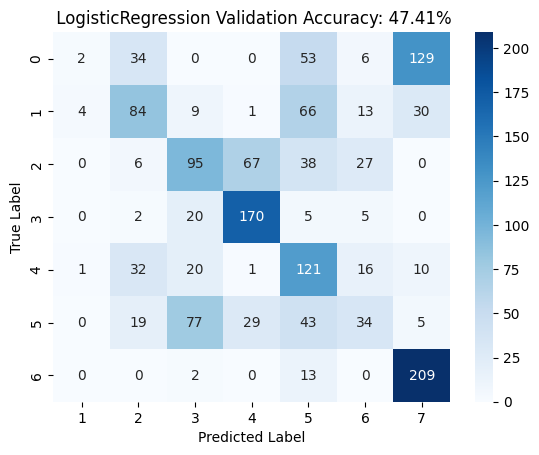

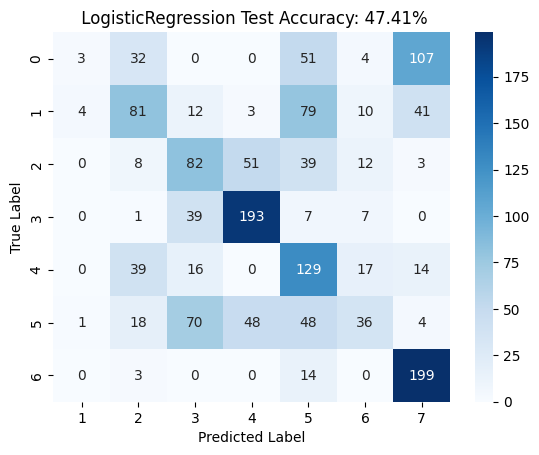

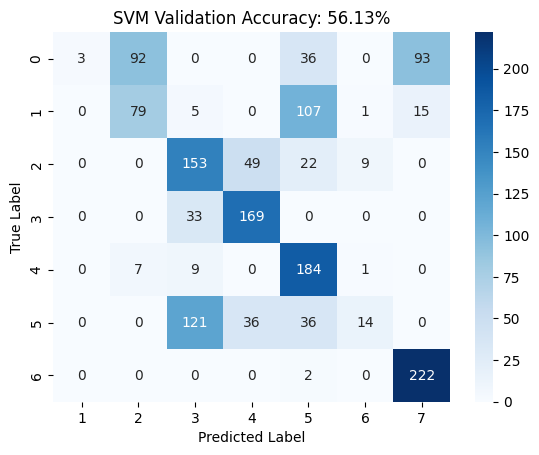

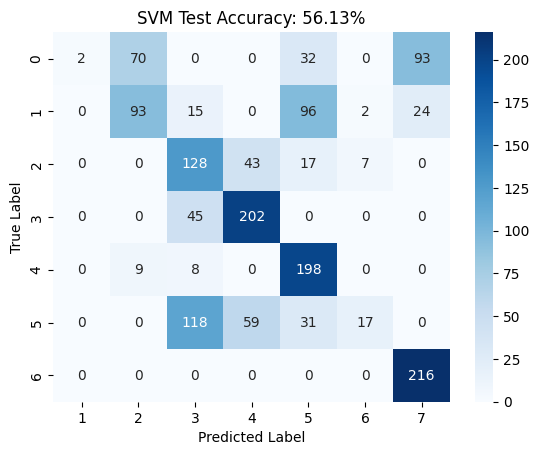

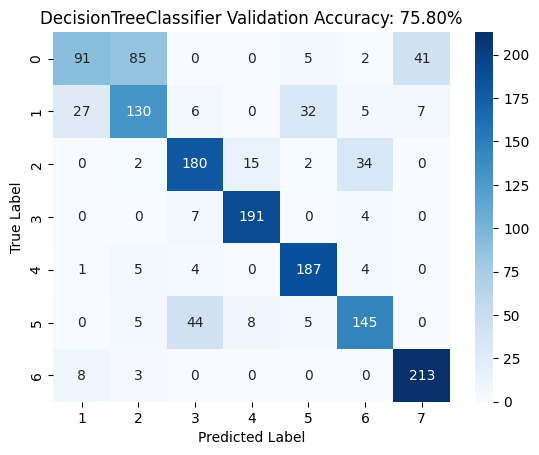

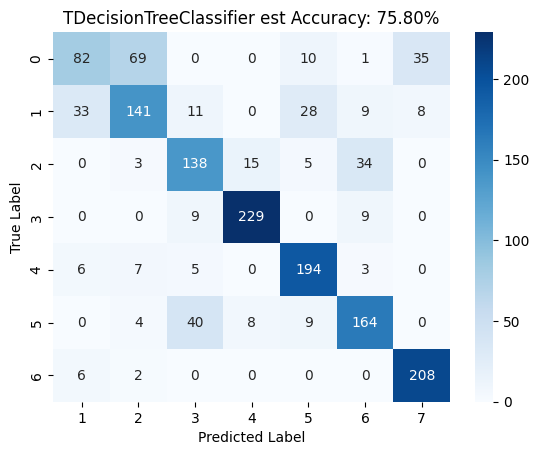

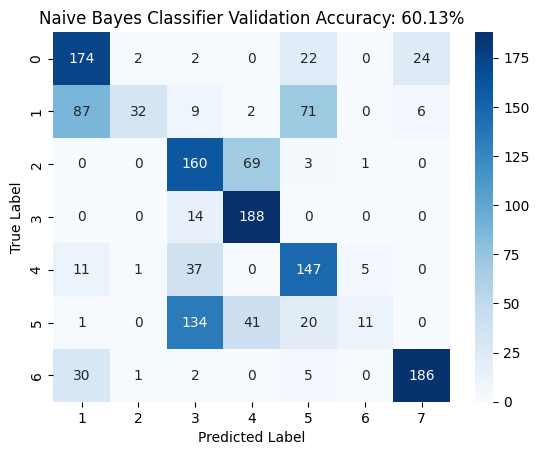

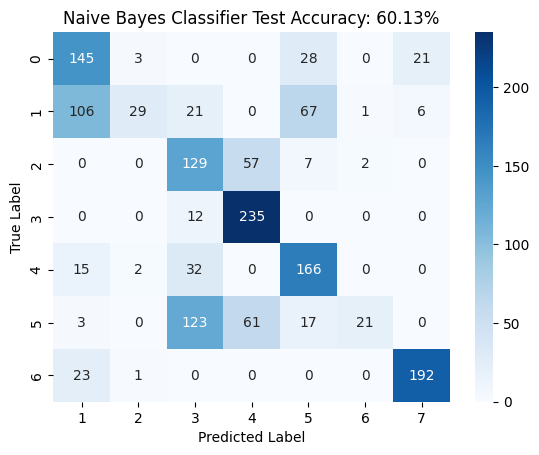

In [ ]:
# Plot the confusion matrix and accuracy for each dataset for knn model
sns.heatmap(knn_val_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'knn Validation Accuracy: {knn_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

sns.heatmap(knn_test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'knn Test Accuracy: {knn_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the confusion matrix and accuracy for each dataset for  LogisticRegression model
sns.heatmap(lr_val_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f' LogisticRegression Validation Accuracy: {lr_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

sns.heatmap(lr_test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f' LogisticRegression Test Accuracy: {lr_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the confusion matrix and accuracy for each dataset for SVM model
sns.heatmap(svm_val_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'SVM Validation Accuracy: {svm_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

sns.heatmap(svm_test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'SVM Test Accuracy: {svm_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the confusion matrix and accuracy for each dataset for DecisionTreeClassifier model
sns.heatmap(dt_val_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'DecisionTreeClassifier Validation Accuracy: {dt_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

sns.heatmap(dt_test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'TDecisionTreeClassifier est Accuracy: {dt_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the confusion matrix and accuracy for each dataset for naieve bayas model
sns.heatmap(nb_val_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'Naive Bayes Classifier Validation Accuracy: {nb_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

sns.heatmap(nb_test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.title(f'Naive Bayes Classifier Test Accuracy: {nb_test_acc:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


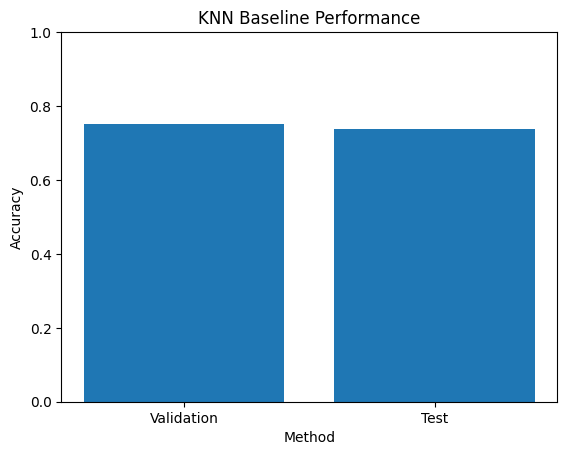

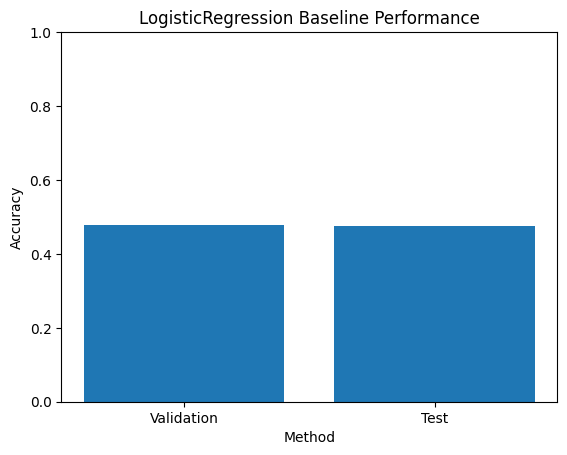

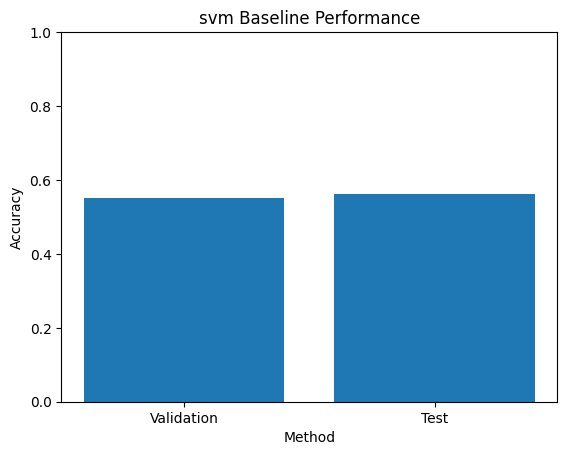

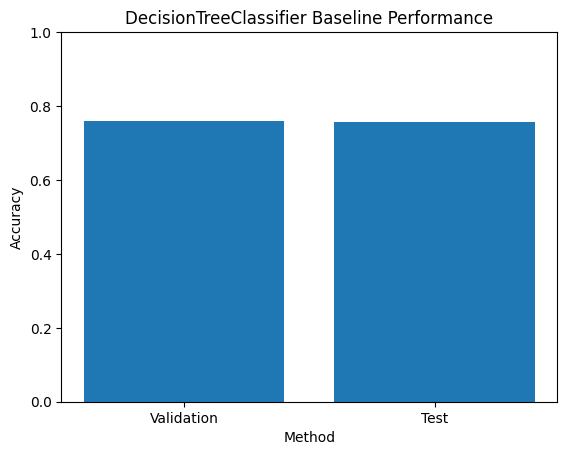

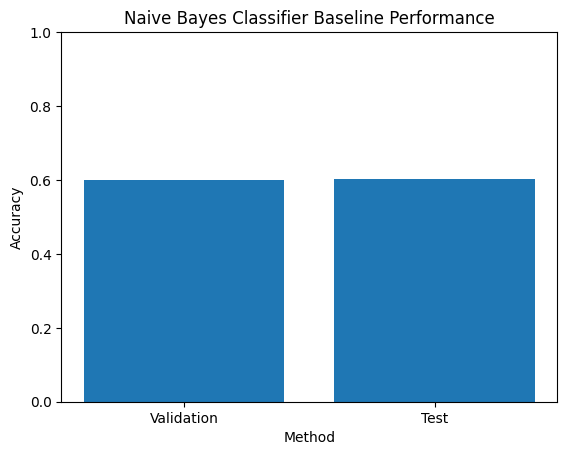

In [ ]:
# Plot the accuracy of each method in a bar-chart as a baseline for knn model
methods = ['Validation', 'Test']
accuracies = [knn_val_acc, knn_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('KNN Baseline Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

# Plot the accuracy of each method in a bar-chart as a baseline for LogisticRegression model
methods = ['Validation', 'Test']
accuracies = [lr_val_acc, lr_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('LogisticRegression Baseline Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

# Plot the accuracy of each method in a bar-chart as a baseline for LogisticRegression model
methods = ['Validation', 'Test']
accuracies = [svm_val_acc, svm_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('svm Baseline Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

# Plot the accuracy of each method in a bar-chart as a baseline for DecisionTreeClassifier model
methods = ['Validation', 'Test']
accuracies = [dt_val_acc, dt_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('DecisionTreeClassifier Baseline Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

# Plot the accuracy of each method in a bar-chart as a baseline for DecisionTreeClassifier model
methods = ['Validation', 'Test']
accuracies = [nb_val_acc, nb_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('Naive Bayes Classifier Baseline Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()


# feature selection Filter based approach using iformation gain

In [ ]:
#select the best features for information gain
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
  fs = FSM
  fs.fit(X_train, y_train)
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test)
  model.fit(X_train_new, y_train)
  y_pred = model.predict(X_test_new)
  acc = accuracy_score(y_test, y_pred) * 100

  return acc

In [ ]:
#information gain feature selection with KNN
knn_acc_dict = {}
for nf in range(1, X_train.shape[1] + 1):
  fsm =  SelectKBest(mutual_info_classif, k=nf)
  acc = select_feature(X_train, y_train, X_test, y_test, fsm,knn)
  knn_acc_dict[nf] = acc

#information gain feature selection with Decision tree
dt_acc_dict = {}
for n_f in range(1, X_train.shape[1] + 1):
  FSM =  SelectKBest(mutual_info_classif, k=n_f)
  dt_acc = select_feature(X_train, y_train, X_test, y_test, FSM, clf)
  dt_acc_dict[n_f] = dt_acc



In [ ]:
#plot the accuracy for the filter based feature selection  for the knn model
plt.figure(figsize=(8, 6))
plt.plot(*zip(*sorted(knn_acc_dict.items())))
plt.axhline(y=knn_test_acc*100, color='red', linestyle='--', label='KNN baseline')
Title = "Feature Selection with Information Gain Method - KNN"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.show()

print("Baseline knn accuracy:", knn_test_acc)
print("Maximum knn accuracy:", max(knn_acc_dict.values()))
print("Best number of features:", max(knn_acc_dict, key=knn_acc_dict.get))

#plot the accuracy for the filter based feature selection  for the Decision tree model
plt.figure(figsize=(8, 6))
plt.plot(*zip(*sorted(dt_acc_dict.items())))
plt.axhline(y=dt_test_acc*100, color='red', linestyle='--', label='KNN baseline')
Title = "Feature Selection with Information Gain Method - Decision Tree"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.show()

print("Baseline Decision tree accuracy:", dt_test_acc)
print("Maximum Decision tree accuracy:", max(dt_acc_dict.values()))
print("Best number of features:", max(dt_acc_dict, key=dt_acc_dict.get))

# **feature selection wrapper based approach using  rfe for Decision tree**

In [33]:
num_features = range(1, X_train.shape[1] + 1)

# Scale the features (important for DT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# RFE feature selection with Decision Tree
rfe_accuracies_decision_tree = []

for k in num_features:
    selector_decision_tree = RFE(clf, n_features_to_select=k)
    selector_decision_tree.fit(X_train_scaled, y_train)
    X_train_selected_decision_tree = selector_decision_tree.transform(X_train_scaled)
    X_validation_selected_decision_tree = selector_decision_tree.transform(X_validation_scaled)
    X_test_selected_decision_tree = selector_decision_tree.transform(X_test_scaled)

    # Train and evaluate Decision Tree on selected features
    clf.fit(X_train_selected_decision_tree, y_train)
    y_pred_val_decision_tree = clf.predict(X_validation_selected_decision_tree)
    accuracy_val_decision_tree = accuracy_score(y_val, y_pred_val_decision_tree)*100
    rfe_accuracies_decision_tree.append(accuracy_val_decision_tree)

    y_pred_test_decision_tree = clf.predict(X_test_selected_decision_tree)
    accuracy_test_decision_tree = accuracy_score(y_test, y_pred_test_decision_tree)




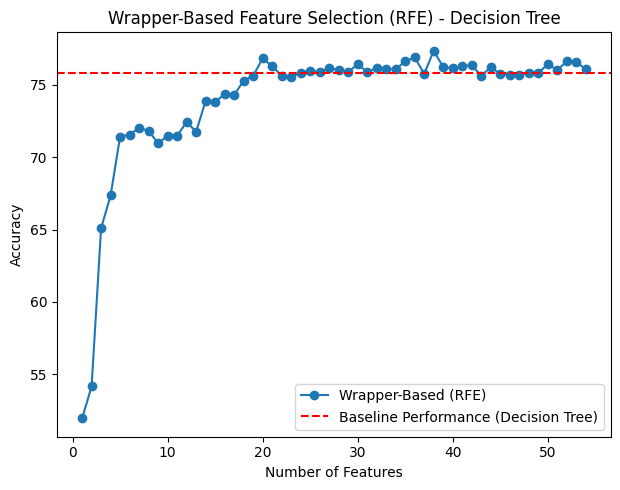

Baseline Decision tree accuracy: 75.80327868852459
Maximum accuracy for RFE with Decision Tree: 77.37%
Best number of features : 38


In [34]:
# Plotting the results for Wrapper-Based Approach (RFE) with Decision Tree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(num_features, rfe_accuracies_decision_tree, marker='o', label='Wrapper-Based (RFE)')
plt.axhline(y=dt_test_acc*100, color='r', linestyle='--', label='Baseline Performance (Decision Tree)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title(f'Wrapper-Based Feature Selection (RFE) - Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()

print("Baseline Decision tree accuracy:", dt_test_acc*100)
# Print the maximum accuracy value for RFE
max_acc_decision_tree = max(rfe_accuracies_decision_tree)
max_acc_decision_tree_num_features = rfe_accuracies_decision_tree.index(max_acc_decision_tree) + 1
print(f'Maximum accuracy for RFE with Decision Tree: {max_acc_decision_tree:.2f}%' )
print(f'Best number of features : {max_acc_decision_tree_num_features}')

# **feature selection wrapper based approach using sfs for knn

In [35]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
num_features = range(1, 25)
# Sequential feature selection with KNN
sfs_accuracies_knn = []

for k in num_features:
    sfs_knn = SequentialFeatureSelector(knn, n_features_to_select=k, scoring='accuracy', cv=5)
    sfs_knn.fit(X_train_scaled, y_train)
    X_train_selected_knn = sfs_knn.transform(X_train_scaled)
    X_val_selected_knn = sfs_knn.transform(X_val_scaled)
    X_test_selected_knn = sfs_knn.transform(X_test_scaled)

    # Train and evaluate KNN on selected features
    knn.fit(X_train_selected_knn, y_train)
    y_pred_val_knn = knn.predict(X_val_selected_knn)
    accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)*100
    sfs_accuracies_knn.append(accuracy_val_knn)

    y_pred_test_knn = knn.predict(X_test_selected_knn)
    accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)


In [ ]:
# Plot the results for Wrapper-Based Approach (SFS)
plt.figure(figsize=(12, 5))

# Wrapper-based approach - KNN
plt.subplot(1, 2, 1)
plt.plot(num_features, sfs_accuracies_knn, marker='o', label='Wrapper-Based (SFS)')
plt.axhline(y=knn_test_acc, color='r', linestyle='--', label='Baseline Performance (KNN)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title(f'Wrapper-Based Feature Selection (SFS) - KNN')
plt.legend()

plt.tight_layout()
plt.show()

print("Baseline Decision tree accuracy:", knn_test_acc*100)
# Print the maximum accuracy value for RFE
max_acc_knn = max(sfs_accuracies_knn)
max_acc_knn_num_features = sfs_accuracies_knn.index(max_acc_knn) + 1
print(f'Maximum accuracy for RFE with Decision Tree: {max_acc_knn:.2f}%')
print(f'Best number of features : {max_acc_knn_num_features}')

# **Question #3**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)

rf_val_acc = accuracy_score(y_val, rf_val_pred)
rf_val_cm = confusion_matrix(y_val, rf_val_pred)

rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_test_cm = confusion_matrix(y_test, rf_test_pred)

In [ ]:
# Build and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=1)
gb_model.fit(X_train, y_train)
gb_val_pred = gb_model.predict(X_val)
gb_test_pred = gb_model.predict(X_test)

gb_val_acc = accuracy_score(y_val, gb_val_pred)
gb_val_cm = confusion_matrix(y_val, gb_val_pred)

gb_test_acc = accuracy_score(y_test, gb_test_pred)
gb_test_cm = confusion_matrix(y_test, gb_test_pred)

In [ ]:
# Build and train the AdaBoost model
ada_model = AdaBoostClassifier(random_state=1)
ada_model.fit(X_train, y_train)
ada_val_pred = ada_model.predict(X_val)
ada_test_pred = ada_model.predict(X_test)

ada_val_acc = accuracy_score(y_val, ada_val_pred)
ada_val_cm = confusion_matrix(y_val, ada_val_pred)

ada_test_acc = accuracy_score(y_test, ada_test_pred)
ada_test_cm = confusion_matrix(y_test, ada_test_pred)

In [ ]:
# Print the accuracy of each model
print(f" Random Forest validation accuracy:{ rf_val_acc} \n Random Forest test accuracy:{ rf_test_acc}")
print(f"\n \n Gradient Boosting validation accuracy {gb_val_acc} \n Gradient Boosting test accuracy {gb_test_acc}")
print(f" \n \n AdaBoost model validation accuracy:{ada_val_acc} \n AdaBoost model test accuracy:{ada_test_acc} ")

 Random Forest validation accuracy:0.8164218958611482 
 Random Forest test accuracy:0.8170491803278689

 
 Gradient Boosting validation accuracy 0.780373831775701 
 Gradient Boosting test accuracy 0.7685245901639344
 
 
 AdaBoost model validation accuracy:0.35647530040053405 
 AdaBoost model test accuracy:0.3442622950819672 


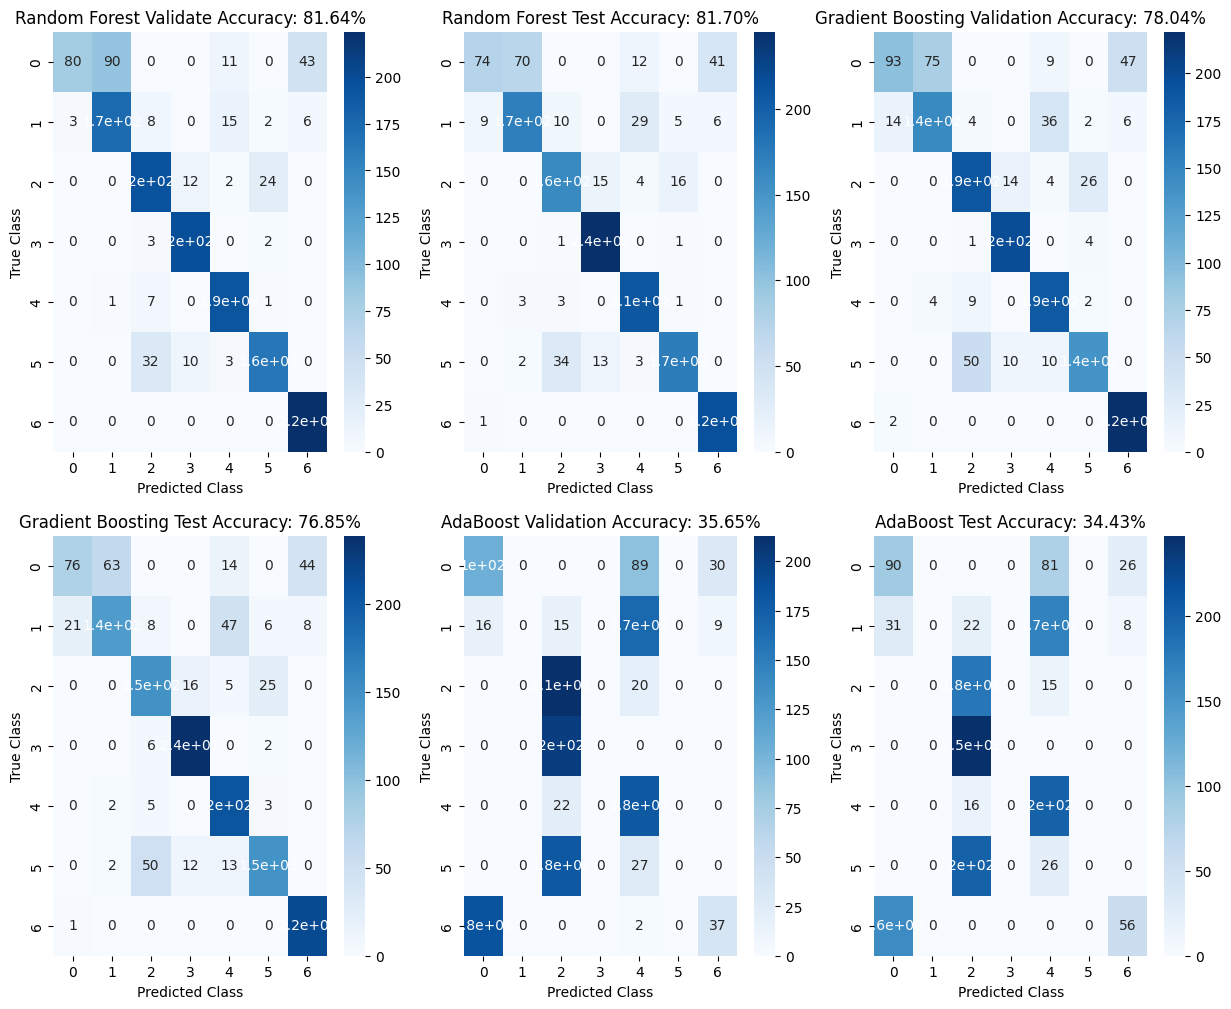

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")

# Plot the confusion matrix for each model
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plot_confusion_matrix(rf_val_cm, f"Random Forest Validate Accuracy: {rf_val_acc:.2%}")
plt.subplot(2, 3, 2)
plot_confusion_matrix(rf_test_cm, f"Random Forest Test Accuracy: {rf_test_acc:.2%}")
plt.subplot(2, 3, 3)
plot_confusion_matrix(gb_val_cm, f"Gradient Boosting Validation Accuracy: {gb_val_acc:.2%}")
plt.subplot(2, 3, 4)
plot_confusion_matrix(gb_test_cm, f"Gradient Boosting Test Accuracy: {gb_test_acc:.2%}")
plt.subplot(2, 3, 5)
plot_confusion_matrix(ada_val_cm, f"AdaBoost Validation Accuracy: {ada_val_acc:.2%}")
plt.subplot(2, 3, 6)
plot_confusion_matrix(ada_test_cm, f"AdaBoost Test Accuracy: {ada_test_acc:.2%}")

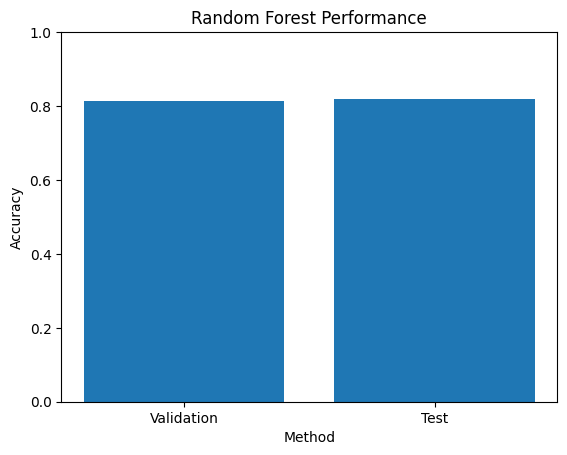

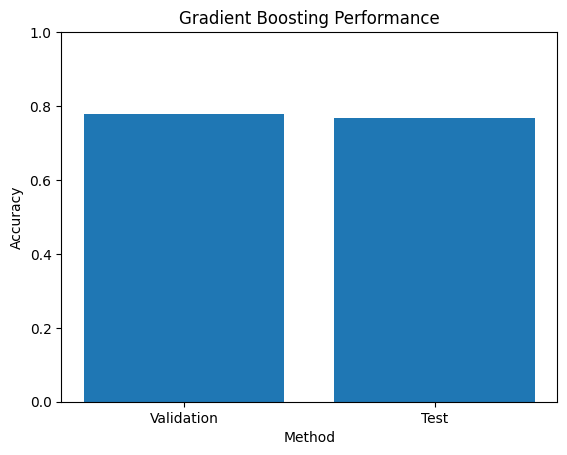

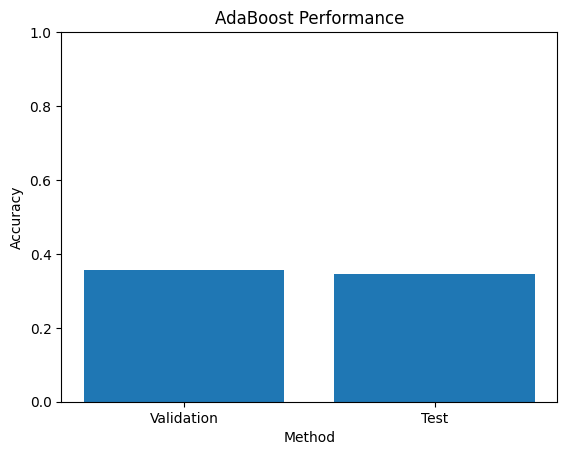

In [ ]:
# Plot the accuracy of each method in a bar-chart for Random Forest model
methods = ['Validation', 'Test']
accuracies = [rf_val_acc, rf_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('Random Forest Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

# Plot the accuracy of each method in a bar-chart for Gradient Boosting model
methods = ['Validation', 'Test']
accuracies = [gb_val_acc, gb_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('Gradient Boosting Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

# Plot the accuracy of each method in a bar-chart for AdaBoost model
methods = ['Validation', 'Test']
accuracies = [ada_val_acc, ada_test_acc]

plt.bar(methods, accuracies)
plt.ylim(0, 1)
plt.title('AdaBoost Performance')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

the best accuracy till now is 81.7% from Random Forest model




## **Question 4**
find the best number of cluster to improve the supervised model.
show if SOFM provides improvement through PKI Strategy

In [ ]:
# Normalize the data before clustering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

train_data = np.array(X_train_scaled)
test_data = np.array(X_test_scaled)
val_data = np.array(X_val_scaled)

In [ ]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

Y_out_train = rf_model.predict(X_train)
Y_out_val = rf_model.predict(X_val)
Y_out_test= rf_model.predict(X_test)

In [ ]:
def unsupervised_sofm(num_clusters):

    som = MiniSom(num_clusters, num_clusters,train_data.shape[1], sigma=0.5, learning_rate=0.001)
    som.random_weights_init(train_data)
    som.train_batch(train_data, 100)

    return som


In [ ]:
# Step 3: Train the PKI model (DNN) for each SOFM size
def create_pki_model():

    mlp_model = keras.models.Sequential()
    mlp_model.add(Dense(30, input_dim = 2, activation='tanh'))
    mlp_model.add(Dense(30, activation='tanh'))
    mlp_model.add(Dense(30, activation='tanh'))
    mlp_model.add(Dense(30, activation='tanh'))
    mlp_model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

    return mlp_model

In [ ]:
# Step 4: Evaluate the PKI-based improvement for each SOFM size
cluster_sizes = [6, 7, 8, 9, 10, 11, 12]
accuracies = []

for sofm_structure in cluster_sizes:

    # Train the unsupervised SOFM model
    sofm_model = unsupervised_sofm(sofm_structure)

    cluster_train = np.array([sofm_model.winner(x) for x in X_train_scaled]).T
    cluster_val = np.array([sofm_model.winner(x) for x in X_val_scaled]).T
    cluster_test = np.array([sofm_model.winner(x) for x in X_test_scaled]).T

    y_cluster_train = np.ravel_multi_index(cluster_train, (sofm_structure,sofm_structure))
    y_cluster_val = np.ravel_multi_index(cluster_val, (sofm_structure,sofm_structure))
    y_cluster_test = np.ravel_multi_index(cluster_test, (sofm_structure,sofm_structure))

    # One-hot encode the cluster labels for y_cluster_train
    y_train_encoded =  pd.get_dummies(y_train)
    y_test_encoded = pd.get_dummies(y_test)

    y_pki_train = pd.DataFrame({'Y_out_train': y_train, 'Y_cluster_train': y_cluster_train})
    y_pki_test = pd.DataFrame({'Y_out_test': y_test, 'Y_cluster_train': y_cluster_test})
    y_pki_val = pd.DataFrame({'Y_out_va;': y_val, 'Y_cluster_train': y_cluster_val})

    # Create the PKI model
    pki_model = create_pki_model()
    pki_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['accuracy'])
    pki_model.fit(y_pki_train, y_train_encoded, epochs=50, batch_size=32)


    loss, accuracy = pki_model.evaluate(y_pki_test, y_test_encoded)
    print(f"SOFM {sofm_structure}x{sofm_structure} -  Loss: {loss},  Accuracy: {accuracy}")
    accuracies.append(accuracy)


Epoch 1/50
259/259 [==============================] - 2s 2ms/step - loss: 0.1651 - accuracy: 0.4919
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.6898
Epoch 3/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.7469
Epoch 4/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.7696
Epoch 5/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.7723
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0621 - accuracy: 0.7845
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.7845
Epoch 8/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.7845
Epoch 9/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.7845
Epoch 10/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.7845

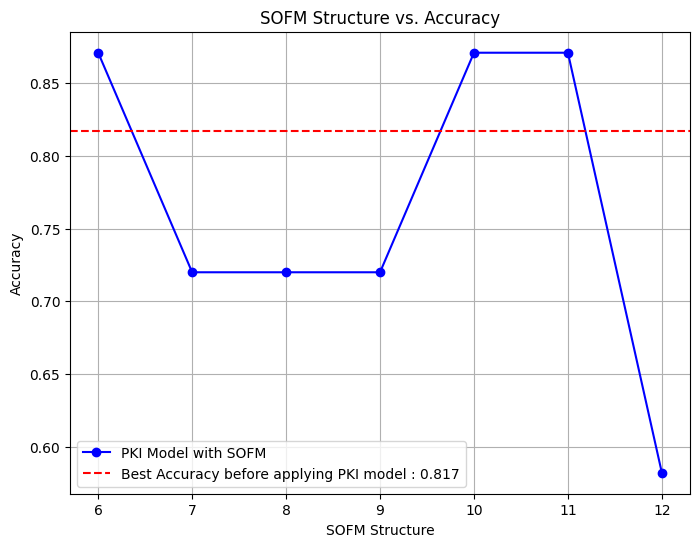

In [ ]:

# Plot the number of neurons in the SOFM structure vs. accuracy
best_accuracy = 0.817
plt.figure(figsize=(8, 6))
plt.plot(cluster_sizes, accuracies, marker='o', linestyle='-', color='blue', label='PKI Model with SOFM')
plt.axhline(y=best_accuracy, color='red', linestyle='--', label=f'Best Accuracy before applying PKI model : {best_accuracy:.3f}')
#plt.axhline(y=best_accuracy, color='red', linestyle='--', label='Second Improvement (Q3)')
plt.xlabel('SOFM Structure')
plt.ylabel('Accuracy')
plt.title('SOFM Structure vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# # The best SOFM structure can be obtained using: best_sofm_structure = sofm_structures[best_improvement_idx]


In [ ]:
#best sofm structure is (7,7)
accuracy_val_list = []
accuracy_test_list = []
neurons = [36, 49, 64, 81, 100, 121, 144]

sofm2 = MiniSom(7, 7,train_data.shape[1], sigma=0.5, learning_rate=0.001)
sofm2.random_weights_init(train_data)
sofm2.train_batch(train_data, 100)

cluster_train2 = np.array([sofm2.winner(x) for x in X_train_scaled]).T
cluster_val2 = np.array([sofm2.winner(x) for x in X_val_scaled]).T
cluster_test2 = np.array([sofm2.winner(x) for x in X_test_scaled]).T

y_cluster_train2 = np.ravel_multi_index(cluster_train2, (7,7))
y_cluster_val2 = np.ravel_multi_index(cluster_val2, (7,7))
y_cluster_test2 = np.ravel_multi_index(cluster_test2, (7,7))

y_pki_train2 = pd.DataFrame({'Y_out_train': y_train, 'Y_cluster_train': y_cluster_train2})
y_pki_test2 = pd.DataFrame({'Y_out_test': y_test, 'Y_cluster_train': y_cluster_test2})
y_pki_val2 = pd.DataFrame({'Y_out_va;': y_val, 'Y_cluster_train': y_cluster_val2})

# One-hot encode the cluster labels for y_cluster_train
y_train_encoded =  pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)
y_val_encoded = pd.get_dummies(y_val)


for neuron in neurons:

    mlp_model2 = keras.models.Sequential()
    mlp_model2.add(Dense(neuron, input_dim = 2, activation='tanh'))
    mlp_model2.add(Dense(neuron, activation='tanh'))
    mlp_model2.add(Dense(neuron, activation='tanh'))
    mlp_model2.add(Dense(neuron, activation='tanh'))
    mlp_model2.add(Dense(len(np.unique(y_train)), activation='softmax'))


    y_pki_train2 = pd.DataFrame({'Y_out_train': y_train, 'Y_cluster_train': y_cluster_train2})
    y_pki_test2 = pd.DataFrame({'Y_out_test': y_test, 'Y_cluster_train': y_cluster_test2})
    y_pki_val2 = pd.DataFrame({'Y_out_va;': y_val, 'Y_cluster_train': y_cluster_val2})

    # Create the PKI model
    mlp_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['accuracy'])
    mlp_model2.fit(y_pki_train2, y_train_encoded, epochs=50, batch_size=32)


    loss2, accuracy2 = mlp_model2.evaluate(y_pki_test2, y_test_encoded)
    loss3, accuracy3 = mlp_model2.evaluate(y_pki_val2, y_val_encoded)

    accuracy_test_list.append(accuracy2)
    accuracy_val_list.append(accuracy3)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 0.1621 - accuracy: 0.4728
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.6233
Epoch 3/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.7164
Epoch 4/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.7425
Epoch 5/50
259/259 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.7439
Epoch 6/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.7450
Epoch 7/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.6848
Epoch 8/50
259/259 [==============================] - 1s 2ms/step - loss: 0.1992 - accuracy: 0.3033
Epoch 9/50
259/259 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.3071
Epoch 10/50
259/259 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.5816

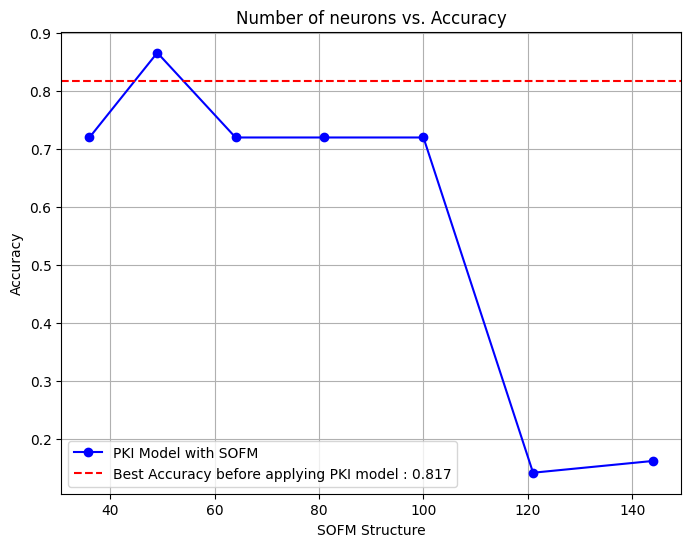

In [ ]:
# Plot the number of neurons in the SOFM structure vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(neurons, accuracy_test_list, marker='o', linestyle='-', color='blue', label='PKI Model with SOFM')
plt.axhline(y=best_accuracy, color='red', linestyle='--', label=f'Best Accuracy before applying PKI model : {best_accuracy:.3f}')


#plt.axhline(y=best_accuracy, color='red', linestyle='--', label='Second Improvement (Q3)')
plt.xlabel('SOFM Structure')
plt.ylabel('Accuracy')
plt.title('Number of neurons vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# # The best SOFM structure can be obtained using: best_sofm_structure = sofm_structures[best_improvement_idx]

### **Question 5**

In [ ]:

# Define the list of different numbers of hidden layers and neurons
num_hidden_layers_list = [2, 3, 5 , 6 , 7]  # Try 1, 2, and 3 hidden layers

accuracy_test_results = []  # Dictionary to store test accuracies for each configuration
accuracy_val_results = []  # Dictionary to store validation accuracies for each configuration

# Loop over different numbers of hidden layers
for num_hidden_layers in num_hidden_layers_list:
    # Loop over different numbers of neurons in each layer
        mlp_model = keras.models.Sequential()

        # Add the input layer
        mlp_model.add(Dense(49, input_dim=2, activation='tanh'))

        # Add the hidden layers
        for _ in range(num_hidden_layers - 1):
            mlp_model.add(Dense(49, activation='tanh'))

        # Add the output layer
        mlp_model.add(Dense(len(np.unique(y_train)), activation='softmax'))

        y_pki_train3 = pd.DataFrame({'Y_out_train': y_train, 'Y_cluster_train': y_cluster_train2})
        y_pki_test3 = pd.DataFrame({'Y_out_test': y_test, 'Y_cluster_train': y_cluster_test2})
        y_pki_val3 = pd.DataFrame({'Y_out_val': y_val, 'Y_cluster_train': y_cluster_val2})

        # Create the PKI model
        mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['accuracy'])
        mlp_model.fit(y_pki_train3, y_train_encoded, epochs=50, batch_size=32, verbose=0)

        loss_test, accuracy4 = mlp_model.evaluate(y_pki_test3, y_test_encoded)
        loss_val, accuracy5 = mlp_model.evaluate(y_pki_val3, y_val_encoded)

        accuracy_test_results.append(accuracy4)
        accuracy_val_results.append(accuracy5)




47/47 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.7123


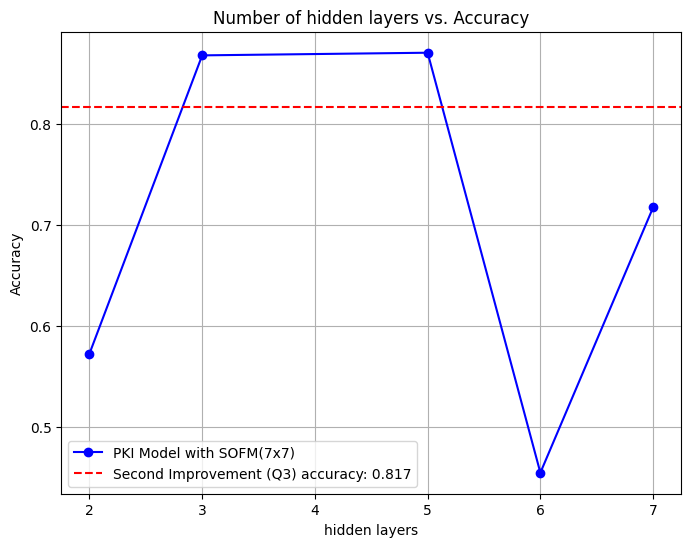

In [ ]:
# Plot the number of neurons in the SOFM structure vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(num_hidden_layers_list, accuracy_test_results, marker='o', linestyle='-', color='blue', label='PKI Model with SOFM(7x7)')
plt.axhline(y=best_accuracy, color='red', linestyle='--', label=f'Second Improvement (Q3) accuracy: {best_accuracy:.3f}')
plt.xlabel('hidden layers')
plt.ylabel('Accuracy')
plt.title('Number of hidden layers vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()
